# 1. Introduction

## 1.1. Project Description
In this project, Machine Learning algorithms are implemented for the purpose of predicting price of diamond based on the gemstone quality and physical properties (such as dimension, color, clarity, etc.). By leveraging the benefits of Python programming language and Machine Learning, reliable predictive models can be developed based on a large set of data. Machine Learning basically allows mapping different settings of exploratory variables (X's) onto the response variable (Y), which in turn facilitates prediction of response variable given any set of exploratory variables.  

This project aims at developing an accurate and realible price-prediction model of diamond based on the physical properties of the diamond. Provided that the specific details regarding the quality and physical properties of a particular diamond are known, its price can be predicted with the model. The accurate and reliable model can prove to be useful to potential diamond buyers through budget planning before actually stepping into the gemstone market for purchase. Moreover, the model could be deployed on a website or application/ software that serves as a diamond-trading platform, which could then allow users to have a glimpse of diamond prices.


In brief, the approach used in this project involve detailed statistical and exploratory data analysis in order to gain insights into the data distribution, statistical parameters such as measures of central tendency, and the relationship (including Pearson's correlation) between exploratory variables (diamond quality and physical attributes) and the response variable (diamond selling price). Then, stratified-shuffle-splitting was performed for stratified sampling of data to split the dataset into training set and test set in a 85:15 percentage ratio respectively. A pipeline was then created in order to automate the data preparation procedures. Finally, several Machine Learning regression models were trained on the training set, followed by hyperparameters tuning and ultimately testing the model on the test set and model performance evaluation. 

## 1.2. Description of the Dataset

## Description of the Dataset

**Note:** Information regarding availability of the original dataset can be found in the notebook *dataset.ipynb*.

The *diamonds* dataset contains a total of 53,940 rows, with each row representing diamond instance. Additionally, there are a total of 10 columns, with representing a single variable (both the exploratory variables as well as the response variable). The exploratory variables (also known as attributes) consist of:
* Carat: Refers to the weight of diamond; one carat is equivalent to 200 milligrams. The carat weight of a diamond has no direct relationship with its size.
    * Diamond carat weight is one of the key factors when determining diamond price. Diamonds prices increase much more with the increase in carat weight due to the fact that heavier diamonds are rare and also desirable. However, it should be noted that diamonds are priced based on the four Cs: carat, cut, color, and clarity.
    * In the dataset, the maximum and minimum values of carat weight are 0.2 and 5.01 ct, respectively.
* Cut: Diamond cut refers to how well a diamond is cut and polished. Diamond cut quality accounts for how a diamond stone interacts with light and should not be confused with diamond shape (for instance, oval, pear, etc.). A well-cut diamond is luminous and reflects white and colored light back to your eyes, while a poorly-cut diamond is dull. The *diamonds* dataset contains the following values of cut quality: 
    * Ideal: An ideal cut diamond is a round, brilliant, or princess cut diamond that is cut to ideal proportions and angles and has excellent polish and symmetry ratings. An ideal cut diamond reflects almost all the light that enters it, and is among the rarest cuts ([Allen, 2022](https://www.jamesallen.com/education/diamonds/ideal-cut/#:~:text=An%20ideal%20cut%20diamond%20is,is%20among%20the%20rarest%20cuts.)).
    * Premium: Is a white diamond with no colour tint that can be easily noticed by the naked eye; it is not quite ideal ([The Diamonds Store, 2022](https://help.thediamondstore.co.uk/products/diamond-qualities/)).
    * Good: Good-cut diamonds showcase brilliance and sparkle, with much of the light reflecting through the table to the viewer’s eye. These diamonds provide beauty at a lower price point ([Fried, 2022](https://www.diamonds.pro/education/cuts/#:~:text=Fair%20Cut%20Diamonds%20offer%20little,those%20acting%20as%20side%20stones.&text=Poor%20Cut%20Diamonds%20yield%20nearly%20no%20sparkle%2C%20brilliance%20or%20fire.)).
    * Very good: Very good cut Diamonds offer exceptional brilliance and fire. A large majority of the entering light reflects through the diamond’s table. To the naked eye, Very Good cut diamonds provide similar sparkle to those of Excellent (or Premium) grade ([Fried, 2022](https://www.diamonds.pro/education/cuts/#:~:text=Fair%20Cut%20Diamonds%20offer%20little,those%20acting%20as%20side%20stones.&text=Poor%20Cut%20Diamonds%20yield%20nearly%20no%20sparkle%2C%20brilliance%20or%20fire.)).
    * Fair: Fair-cut diamonds offer little brilliance, as light easily exits through the bottom and sides of the diamond ([Fried, 2022](https://www.diamonds.pro/education/cuts/#:~:text=Fair%20Cut%20Diamonds%20offer%20little,those%20acting%20as%20side%20stones.&text=Poor%20Cut%20Diamonds%20yield%20nearly%20no%20sparkle%2C%20brilliance%20or%20fire.)).
* Color: 
* Clarity: 
* Depth: 
* Table: 
* x: 
* y: 
* z: 

* Price is the only response variable in the dataset. Diamond price refers to the recorded selling price for a particular type of diamond stone. The unit of diamond prices is US dollars. 

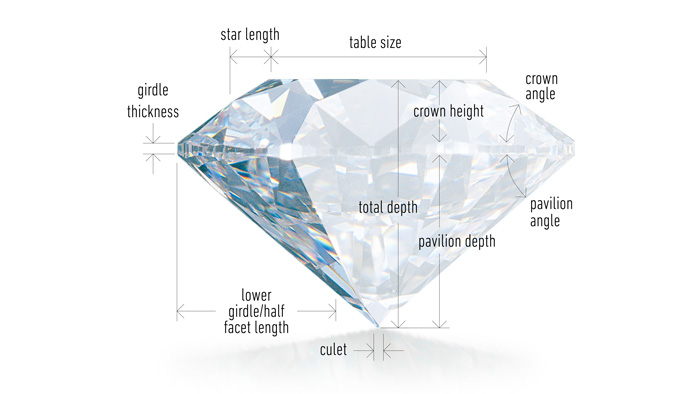

In [1]:
# Illustration of dimensional properties of a typical diamond gemstone

# The following image showing the dimensional properties of a diamond gemstone was downloaded from the GIA website.
# Link to the webpage containing the original image:
# url = "https://4cs.gia.edu/en-us/diamond-cut/"

# Import the Image module
from IPython.display import Image

Image(filename="..\\Images\\Dimensional properties of diamonds.jpg", embed=True)

## 1.3. Performance Measure

The performance measure that will be employed in this supervised learning problem is the Root Mean Square Error (RMSE), which can be represented mathematically as follows:

$ RMSE =  \sqrt{\frac{1}{m} \sum_{i=1}^{m} (h(x^{(i)}) - y^{(i)})^2} $


The RMSE falls in the L^2-norm, which is also known as Euclidean norm. L^2 vector norm is simply a measurement of length between data points determined by calculating the square root of the squared errors between the true and predicted values. The L^2-norm is commonly employed in regression problems; however, care should be taken since its accuracy is affected by the presence and extent of outlier data points.

# 2. Import Libraries and Datasets

## 2.1. Import Libraries

In [2]:
%matplotlib inline

import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pandas.plotting import scatter_matrix
import sklearn
from scipy import stats


# Sci-kit Learn modules
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import(StratifiedShuffleSplit,
                                    cross_val_score,
                                    GridSearchCV,
                                   )
from sklearn.preprocessing import (StandardScaler,
                                   OneHotEncoder,
                                  )

In [3]:
print("Library version:")
print(f"Numpy ver. {np.__version__}")
print(f"Matplotlib ver. {mpl.__version__}")
print(f"Seaborn ver. {sns.__version__}")
print(f"Pandas ver. {pd.__version__}")
print(f"Scikit-Learn ver. {sklearn.__version__}")

Library version:
Numpy ver. 1.21.3
Matplotlib ver. 3.5.1
Seaborn ver. 0.11.2
Pandas ver. 1.4.2
Scikit-Learn ver. 1.0.2


## 2.2. Load the Diamonds Dataset

In [4]:
PATH = "..\Dataset"
DATA = "diamonds.csv"

def load_data(path=PATH, data=DATA, index_col=0):
    datapath = os.path.join(path, data)
    return pd.read_csv(datapath, index_col=index_col)

In [5]:
diamonds = load_data()

In [6]:
# Display the first five rows in the dataset to gain an overview of the dataset
diamonds.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## 2.3. Dataset Formatting

In [7]:
# Modify indices so that they start at zero (0)
new_indices = np.arange(len(diamonds))

diamonds.set_index(new_indices, inplace=True)

In [8]:
# Rearrange attributes (or columns) so that the target attribute (i.e., price) is on the far-right
attributes = ["carat", "cut", "color", "clarity", "depth", "table", "x", "y", "z", "price"]

diamonds = diamonds[attributes]

# 3. Data Exploration, Cleaning, and Preparation

In [9]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   x        53940 non-null  float64
 7   y        53940 non-null  float64
 8   z        53940 non-null  float64
 9   price    53940 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [10]:
print("Summary of statistics for numerical attributes:")
diamonds.describe().T

Summary of statistics for numerical attributes:


,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00


In [11]:
print("Summary of statistics for categorical attributes:")
diamonds.describe(include="O").T

Summary of statistics for categorical attributes:


,count,unique,top,freq
cut,53940,5,Ideal,21551
color,53940,7,G,11292
clarity,53940,8,SI1,13065


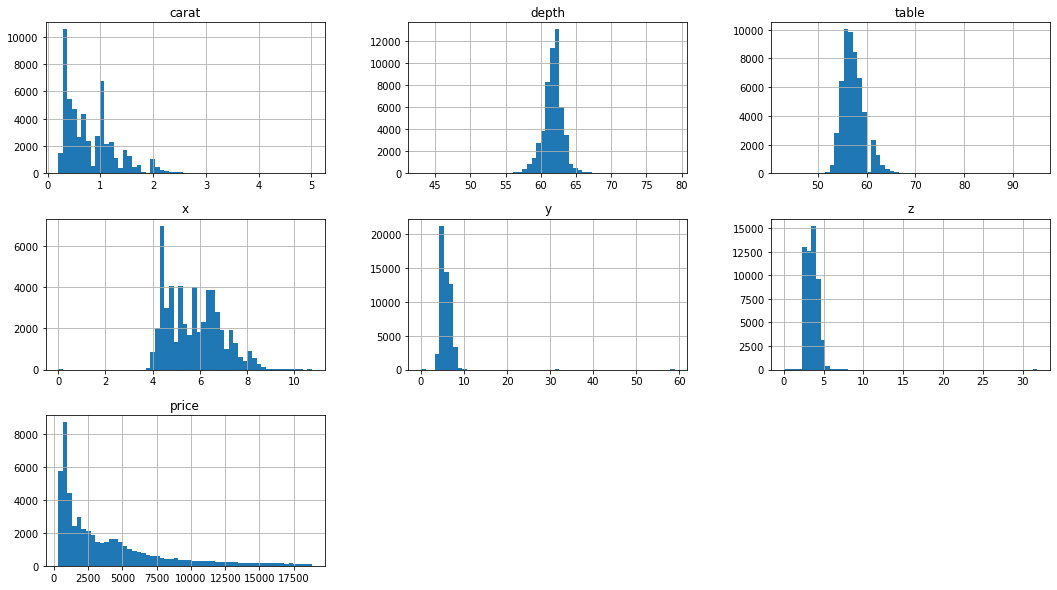

In [12]:
# Histogram plots for numerical attributes
hist_plot = diamonds.hist(figsize=(18,10), bins=55)
plt.show()

## 3.1. Data Cleaning - Dealing with Duplicates

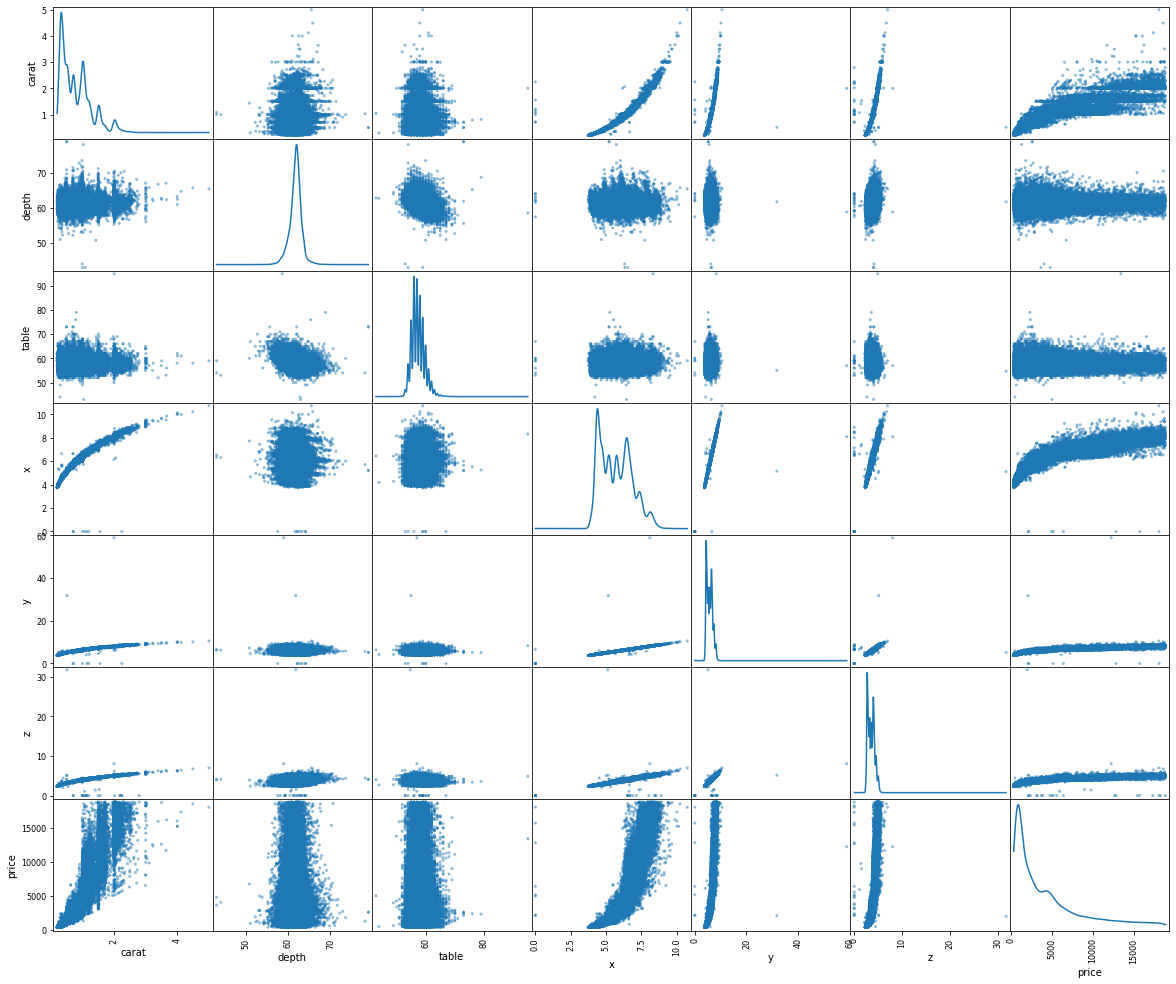

In [13]:
# The scatter matrix plot visualizes data distribution and also shows correlations that exist between attributes

diamonds_scattergram = scatter_matrix(diamonds, alpha=0.5, diagonal="kde", figsize=(20,17))
plt.show()

**Observations:**
* The scatter matrix plot shows the presence of data quirks, which are shown as horizontal lines in most of the carat scattergrams at carat values of about 1.4, 1.5, 2, 2.4, 3 cts, etc. The data quirks could be caused by the presence of duplicate data points.
* In order to prevent the learning algorithm from learning these data quirks, some of these data will be dropped.

### 3.1.1. Drop duplicates 

In [14]:
duplicates = diamonds.duplicated(keep="first")     # Returns indices of duplicate data points
print(f"There are a total of {duplicates.sum()} duplicate data points in the dataset.")

There are a total of 146 duplicate data points in the dataset.


In [15]:
# The duplicates can be viewed by running the following code:
# diamonds[duplicates]

In [16]:
diamonds.drop_duplicates(keep="first", inplace=True)

## 3.2. Creating the Training Set and Test Set

Since the target variable (*price*) has an imbalanced distribution of data, it is important to ensure that the data are well-distributed before splitting the dataset into the training and test sets. This will allow all ranges of values to be included in the training set and test set for effective building of the model.


Therefore, the class *StratifiedShuffleSplit* of *sklearn*, which has excellent performance on imbalanced datases, will be employed for data splitting.

* Looking at the histogram plots, *price* is a tail-heavy distribution (positively skewed).
* Prior to data splitting, diamonds prices will be converted into discrete values grouped in categories (i.e., binning) using Pandas *cut()* method. In the next cell, summary of statistics for *price* is displayed in order to facilitate this process. The histogram plot of diamonds prices is also useful in deciding bin values.
* The summary of statistics for *price* reveals that the minimum, average, and maximum price values are 326, 3,932.80, and 18,823 USD,respectively. Moreover, the median price value is 2,401 USD and 75% of the diamonds have a price of less than 5,326.75 USD.

In [17]:
print("Summary of statistics for diamonds prices:\n")
diamonds[["price"]].describe().T

Summary of statistics for diamonds prices:



,count,mean,std,min,25%,50%,75%,max
price,53794.0,3933.065082,3988.11446,326.0,951.0,2401.0,5326.75,18823.0


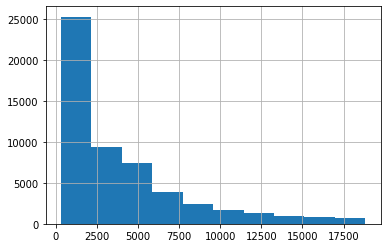

In [18]:
# Visualize diamonds prices distribution 
price_hist = diamonds["price"].hist()

### 3.2.1. Converting the price column into a categorical variable (for data splitting only)
The price column will be binned into 6 categories labeled 1, 2, 3, 4, 5, and 6 in the following range of values in USD:
* Label 1: [0, 700),
* Label 2: [700, 1200),
* Label 3: [1200, 3500),
* Label 4: [3500, 7000),
* Label 5: [7000, 13000), and
* Label 6: [13000, infinity]

The categorical values (range of values) may be considered as low, low-to-moderate, moderate, moderate-to-high, high, and very-high diamond price values, respectively.

A new column named *price_category* will be created and used to store the categorical values and later on for data splitting.

In [19]:
diamonds["price_category"] = pd.cut(diamonds["price"],
                               bins=[0, 700, 1200, 3500, 7000, 13000, np.inf],  # price is of int64 dtype, there is no need to use float bin values (e.g., 0., 700., etc.)
                               labels=[1, 2, 3, 4, 5, 6])

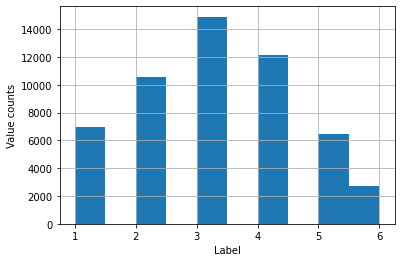

In [20]:
# Visualize data distribution in the price_category column
plt.figure()
plt.xlabel("Label")
plt.ylabel("Value counts")
price_category_hist = diamonds["price_category"].hist()

As it can be observed, the newly created column (*price_category*) has more or less a balanced distribution of data. Data splitting will be performed based on this column.

In [21]:
# Successful StratifiedShuffleSplit operation should attempt to conserve data distribution observed in the targeted column (price_category in this case)
print("Percentage distribution of data in the price_category column:")
total_distr = (diamonds["price_category"].value_counts(sort=False) / len(diamonds)) *100
total_distr

Percentage distribution of data in the price_category column:


1    12.921515
2    19.619288
3    27.701974
4    22.565714
5    12.075696
6     5.115812
Name: price_category, dtype: float64

### 3.2.2. Splitting dataset into train and test sets

In [22]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.15, random_state=0)

In [23]:
for train_index, test_index in split.split(X=diamonds, y=diamonds["price_category"]):
    train_set = diamonds.iloc[train_index]
    test_set = diamonds.iloc[test_index]

In [24]:
print("Percentage data distribution after shuffling and splitting of dataset based on price strata:")
strat_distr = (train_set["price_category"].value_counts(sort=False) / len(train_set)) * 100
strat_distr

Percentage data distribution after shuffling and splitting of dataset based on price strata:


1    12.921004
2    19.619893
3    27.700989
4    22.565830
5    12.076809
6     5.115475
Name: price_category, dtype: float64

In [25]:
# Comparing percentage distributions in the original price_category column and in the stratified train set
percentage_err = strat_distr - total_distr
percentage_err

1   -0.000511
2    0.000605
3   -0.000986
4    0.000116
5    0.001113
6   -0.000337
Name: price_category, dtype: float64

**Discussion:**
The percentage error of data distribution between a stratified-train-set and the original data distribution in the price_category column of the train_set is significantly small and hence negligible (the same could be observed in the startified-test-set). Therefore, it can be said that the stratified sampling is successful and has produced representative samples in both train set and test set.

In [26]:
# Drop the price_category column in both train_- and test_- sets since it is no longer needed
for set_ in (train_set, test_set):
    set_.drop("price_category", axis=1, inplace=True)

C:\Users\dk\AppData\Local\Temp/ipykernel_13000/2151854416.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set_.drop("price_category", axis=1, inplace=True)
C:\Users\dk\AppData\Local\Temp/ipykernel_13000/2151854416.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set_.drop("price_category", axis=1, inplace=True)


## 3.3. Exploration Data Analysis (EDA)

In [27]:
# Create a deep copy of training dataset for EDA
# Deep copy is useful as it prevents modification of the parent dataset (train_set in this case)
diamonds = train_set.copy(deep=True)

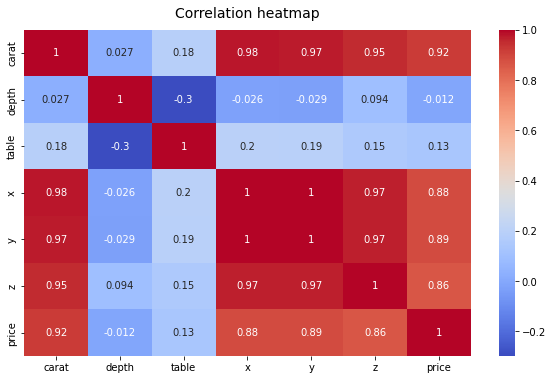

In [28]:
# Correlation analysis using Pearson correlation (linear correlation analysis)
# Pearson correlation coefficient values will be represented on a heatmap
correlation_matrix = diamonds.corr()

plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True)
plt.title("Correlation heatmap", fontsize=14, pad=12)
plt.show()

In the next slides, the scatter matrix plot will be used to visualize linear correlation between strongly-correlated variables (which are carat, x (length), y (width), z (width), and price).

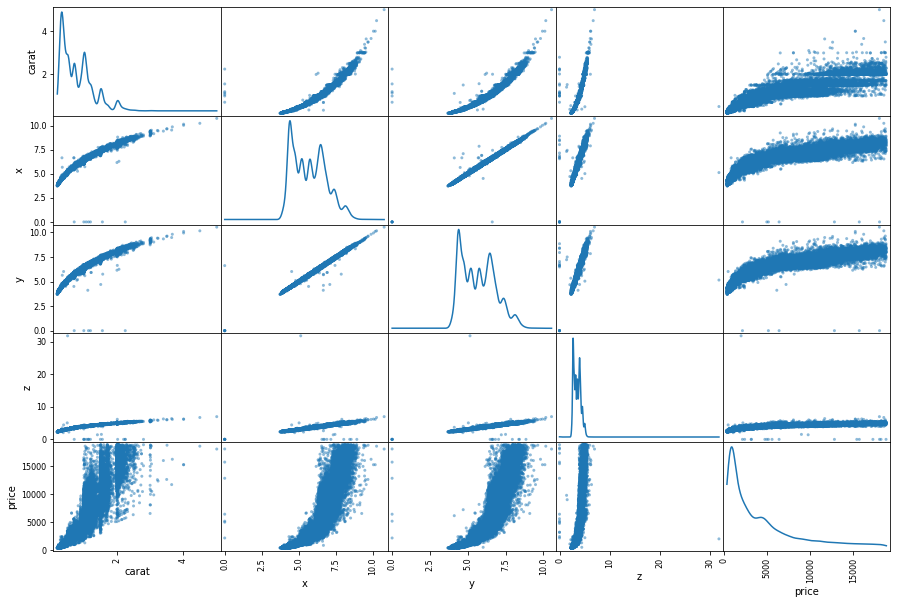

In [29]:
attributes = ["carat", "x", "y", "z", "price"]

scatterMatrixPlot = scatter_matrix(diamonds[attributes], diagonal="kde", alpha=0.5, figsize=(15,10))
plt.show()

**Observations:**
* There is evidence of a strong positive correlation between diamonds prices and attributes such as carat, and diamonds dimensions (x, y, and z).
* A desired narrow data distribution of z, y, and x attributes can also be observed in the scatter matrix plot.
* Data quirks are still present in the scatter plot of price against carat at carat values of about 1.4, 1.5, 2, 3 cts, etc. These data quirks will be dealt with during model fine-tuning.
* Several outliers can be seen on the plot - on all attributes. Like data quirks, outliers will also be dealt with during model fine-tuning.
* The main diagonal plots show Kernel Density Estimate (KDE) plots (KDE plot uses continuous probability density curve to visualize data distribution).

### 3.3.1. Handling the problem of Multi-collinearity

* The correlation heatmap as well as the correlation matrix plots have shown that there is strong positive correlation between several attributes (carat, x, y, and z).
* Multi-collinearity violates one of the assumptions of regression analysis, which requires that all significant exploratory variables must be independent from one another. With multi-collineariry, any changes in value of one of the variables leads to changes in (other) multi-correlated variables.
* Therefore, one way to solve the problem of multi-collinearity is to select only one of the multi-correlated variables which will be used for learning as well as model building process, and dropping other multi-correlated variables.

In [30]:
# Function to identify multi-correlated variables based on some threshold value set by the user

def multi_corr_feats(dataset, corr_method="pearson", threshold=0.7):
    multi_corr_cols = set()     # Will be used to store set of columns that are multi-correlated
    corr_matrix = dataset.corr(method=corr_method)
    for i in np.arange(len(corr_matrix.columns)):
        for j in np.arange(i):
            if np.abs(corr_matrix.iloc[i, j]) > threshold:    # Ensures that even negative correlations will be considered
                col_name = corr_matrix.columns[i]
                multi_corr_cols.add(col_name)
    return multi_corr_cols

In [31]:
print("The following variable(s) are multi-correlated with other variable(s):")
multi_corr_feats(diamonds.drop("price", axis=1), corr_method="pearson", threshold=0.7)

The following variable(s) are multi-correlated with other variable(s):


{'x', 'y', 'z'}

Following the above findings of the multi_corr_feats() function, the returned columns will be dropped from both training and test sets.

In [32]:
cols_to_drop = ["x", "y", "z"]

for col in cols_to_drop:
    train_set.drop(col, axis=1, inplace=True)
    test_set.drop(col, axis=1, inplace=True)

## 3.4. Data Preparation for Model Training

### 3.4.1. Creation of a Pipeline and a Column Transformer

Most machine learning algorithms that rely on distance measurements cannot perform on categorical variables/ values. Therefore, in order to avoid dropping significant categorical attribues, categorical values will be encoded (that is, assigned certain numerical (particularly, nominal) values.

In [33]:
# Split columns of training dataset into attributes and the target variable
X_train = train_set.drop("price", axis=1)     # training dataset containing features
y_train = train_set["price"].copy()           # target variable of the training set

In [34]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45724 entries, 38420 to 20610
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    45724 non-null  float64
 1   cut      45724 non-null  object 
 2   color    45724 non-null  object 
 3   clarity  45724 non-null  object 
 4   depth    45724 non-null  float64
 5   table    45724 non-null  float64
dtypes: float64(3), object(3)
memory usage: 2.4+ MB


In [35]:
# Identifying and classifying features into numerical and categorical features
num_feats = ["carat"]                     # numeric features -> will be subjected to standard scaling
cat_feats= ["cut", "color", "clarity"]    # categorical features -> one hot encoding will be applied

In [36]:
# Specifying pipelines for each classification
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("std_scaler", StandardScaler()),
])

cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore")),
])

In [37]:
# Subjecting each pipeline to the column transformer
preprocess_pipeline = ColumnTransformer([
    ("cont", num_pipeline, num_feats),
    ("cat", cat_pipeline, cat_feats),
    ], remainder="passthrough",
)

In [38]:
diamonds_prepared = preprocess_pipeline.fit_transform(X_train)     # outputs prepared data of X_train for model building

# 4. Model Training and Selection

## 4.1. Linear Regression

* Linear regression is simply a linear regression model and is considered to be one of the simplest machine learning model.
* Linear regression model tries to map independent variable(s) to a dependent variable based on a linear relationship that exists between them.
* Therefore, this model is not considered to be powerful compared to other models such as Decision Tree Regressor (the decision tree regressor is capable of analyzing complex non-linear relationship between independent variables and the dependent variable).

In [39]:
# Create model object
lin_reg = LinearRegression()

In [40]:
# Fit the model
lin_reg.fit(diamonds_prepared, y_train)

LinearRegression()

In [41]:
# Perform predictions on the prepared dataset
lin_predictions = lin_reg.predict(diamonds_prepared)

In [42]:
# Measure model performance
lin_mse = mean_squared_error(y_train, lin_predictions)

In [43]:
# Training score for Lin reg model
lin_rmse = np.sqrt(lin_mse)
np.round(lin_rmse, 4)

1155.196

## 4.2. Decision Tree Regressor

In [44]:
tree_reg = DecisionTreeRegressor()

In [45]:
tree_reg.fit(diamonds_prepared, y_train)

DecisionTreeRegressor()

In [46]:
tree_predictions = tree_reg.predict(diamonds_prepared)

In [47]:
tree_mse = mean_squared_error(y_train, tree_predictions)

In [48]:
tree_rmse = np.sqrt(tree_mse)

In [49]:
# Training score for Dec tree reg model
np.round(tree_rmse, 4)

59.7632

**Discussion:**
* The root mean squared error (RMSE) of the linear regression model suggests that there is a possible underfitting of the model; the spread of about 1155.196 USD is relatively large.
* The Decision tree regression model, which is more powerful than the former, has a very small small RMSE value of about 59.7632 USD. There could possibly be overfitting of the data.
* In the next cells, the calculated training scores of both linear regression model and decision tree regressor will be evaluated against the 10-fold validation scores of each respective model. The cross-validated scores will then be compared to the training scores in order to decide which model performs better.

## 4.3. Model Evaluation using K-fold Cross-Validation

### 4.3.1. Cross Validation on the Linear Regression

In [50]:
scores = cross_val_score(lin_reg, diamonds_prepared, y_train,
                         scoring="neg_mean_squared_error", cv=10)

In [51]:
lin_rmse_scores = np.sqrt(-scores)

In [52]:
def display_scores(scores):
    print(f"Scores: {np.round(scores, 4)}")
    print(f"Mean: {np.round(scores.mean(), 4)}")
    print(f"Standard deviation: {np.round(scores.std(), 4)}")

In [53]:
# Evaluation scores for lin reg model
display_scores(lin_rmse_scores)

Scores: [1176.3696 1120.2644 1133.4635 1166.9015 1179.4366 1163.0492 1153.1304
 1141.5242 1165.     1158.3096]
Mean: 1155.7449
Standard deviation: 17.9475


**Discussion:**
* The linear regression model has an average evaluation score of about 1155.7449 USD with a standard deviation of 17.9475 USD between scores (1155.74 $\pm$ 17.95 USD).
* The difference between the training score (=1155.196 USD) and the average evaluation score (=1155.7449 USD) for the linear regression model is negligible; however, both RMSE scores are fairly large.
* It is thus concluded that the linear regression model underfits the data.

### 4.3.2. Cross Validation on the Decision Tree Regressor

In [54]:
scores = cross_val_score(tree_reg, diamonds_prepared, y_train,
                        scoring="neg_mean_squared_error", cv=10)

In [55]:
tree_rmse_scores = np.sqrt(-scores)

In [56]:
# Evaluation scores for decision tree regressor
display_scores(tree_rmse_scores)

Scores: [724.272  712.9715 721.0075 720.6325 711.4747 735.8318 743.5808 728.0077
 770.605  697.4251]
Mean: 726.5809
Standard deviation: 19.1049


**Discussion:**
* The average RMSE evaluation score of the decision tree regressor is 726.58 $\pm$ 19.10 USD, indicating unsatisfactory model performance on the evaluation sets.
* Compared to the training score of about 59.7632 USD of the same model, it is now evident that the decision tree regressor overfits the data.

## 4.4. Training and Evaluating a Random Forest Regressor

In [57]:
forest_reg = RandomForestRegressor()

In [58]:
forest_reg.fit(diamonds_prepared, y_train)

RandomForestRegressor()

In [59]:
forest_predictions = forest_reg.predict(diamonds_prepared)

In [60]:
forest_mse = mean_squared_error(y_train, forest_predictions)

In [61]:
forest_rmse = np.sqrt(forest_mse)
np.round(forest_rmse, 4)

210.8136

In [62]:
scores = cross_val_score(forest_reg, diamonds_prepared, y_train,
                        scoring="neg_mean_squared_error", cv=10)

In [63]:
forest_rmse_scores = np.sqrt(-scores)

In [64]:
display_scores(forest_rmse_scores)

Scores: [544.9202 541.9726 540.793  560.2879 556.9225 551.0845 574.8729 555.5072
 579.9807 552.5732]
Mean: 555.8915
Standard deviation: 12.3988


**Discussion:**
* The ensemble method Random Forest Regression reveal promising results than the previous models.
* There is a relatively low difference between the training score (=210.8136 USD) and the average evaluation score (=555.8915 USD).
* For now, the Random Forest Regression model will be selected for the upcoming procedures.

## 4.5. Hyperparameters Optimization with Cross-Validation and GridSearch

In [65]:
"""
# Hyperparameters tuning was conducted in a series of steps as outlined:

## FIRST ROUND:
# param_grid = [
#    {"n_estimators": [3, 10, 30], "max_features" = [2, 4, 6]}
# ]

# grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
#                            scoring="neg_mean_squared_error",
#                            return_train_score=True)

# grid_search.fit(diamonds_prepared, y_train)

# grid_search.best_params_

# Output: {"n_estimators": 30, "max_features": 6}
# Conclusion reached: There was a need to increase the range of values explored since the returned best parameters were the high-end values provided.


## SECOND ROUND:
# param_grid = [
#     {"n_estimators": [30, 50, 100], "max_features": [6, 15, 20]},
#     {"bootstrap": [False], "n_estimators": [30, 50, 100], "max_features": [6, 15, 20]},
# ]

# grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
#                            scoring="neg_mean_squared_error",
#                            return_train_score=True)

# grid_search.fit(diamonds_prepared, y_train)

# grid_search.best_params_

# Output: {"n_estimators": 30, "max_features": 15}
# Conclusion reached: Try to experiment parameter values that are closer to the recommended best parameters.


## THIRD ROUND:
# param_grid = [
#     {"n_estimators": [30, 40, 50], "max_features": [15, 20, 25]},
#     {"bootstrap": [False], "n_estimators": [30, 40, 50], "max_features": [15, 20, 25]},
# ]

# grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
#                            scoring="neg_mean_squared_error",
#                            return_train_score=True)

# grid_search.fit(diamonds_prepared, y_train)

# grid_search.best_params_

# Output: {"n_estimators": 40, "max_features": 15}
# Conclusion: The best values for the random forest regressor model hyperparameters are: {"n_estimators": 40, "max_features": 15}

# Then, the final trained model can be obtained by accessing the GridSearch best_estimator_ attribute:
# final_model = grid_search.best_estimator_
"""

'\n# Hyperparameters tuning was conducted in a series of steps as outlined:\n\n## FIRST ROUND:\n# param_grid = [\n#    {"n_estimators": [3, 10, 30], "max_features" = [2, 4, 6]}\n# ]\n\n# grid_search = GridSearchCV(forest_reg, param_grid, cv=5,\n#                            scoring="neg_mean_squared_error",\n#                            return_train_score=True)\n\n# grid_search.fit(diamonds_prepared, y_train)\n\n# grid_search.best_params_\n\n# Output: {"n_estimators": 30, "max_features": 6}\n# Conclusion reached: There was a need to increase the range of values explored since the returned best parameters were the high-end values provided.\n\n\n## SECOND ROUND:\n# param_grid = [\n#     {"n_estimators": [30, 50, 100], "max_features": [6, 15, 20]},\n#     {"bootstrap": [False], "n_estimators": [30, 50, 100], "max_features": [6, 15, 20]},\n# ]\n\n# grid_search = GridSearchCV(forest_reg, param_grid, cv=5,\n#                            scoring="neg_mean_squared_error",\n#                     

# 5. Model Testing on the Test Set

In [66]:
final_model = RandomForestRegressor(n_estimators=40, max_features=15)

In [67]:
final_model.fit(diamonds_prepared, y_train)

RandomForestRegressor(max_features=15, n_estimators=40)

In [68]:
X_test = test_set.drop("price", axis=1)
y_test = test_set["price"].copy()

In [69]:
X_test_prepared = preprocess_pipeline.transform(X_test)

In [70]:
y_test_predictions = final_model.predict(X_test_prepared)

In [71]:
final_mse = mean_squared_error(y_test, y_test_predictions)

In [72]:
final_rmse = np.sqrt(final_mse)
print(final_rmse)

555.5800973380271


## 5.1. Population Estimate of the Generalization Error

In [73]:
confidence = 0.95

In [74]:
squared_errors = (y_test_predictions - y_test)**2

In [75]:
gen_error = np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                        loc=squared_errors.mean(),
                        scale=stats.sem(squared_errors)))

print(f"The generalization error lies between {np.round(gen_error[0], 4)} USD and {np.round(gen_error[1], 4)} USD at {confidence*100}% confidence level.")

The generalization error lies between 525.945 USD and 583.7126 USD at 95.0% confidence level.


## 5.2. Evaluation of Model Performance

### 5.2.1. Model Linearity

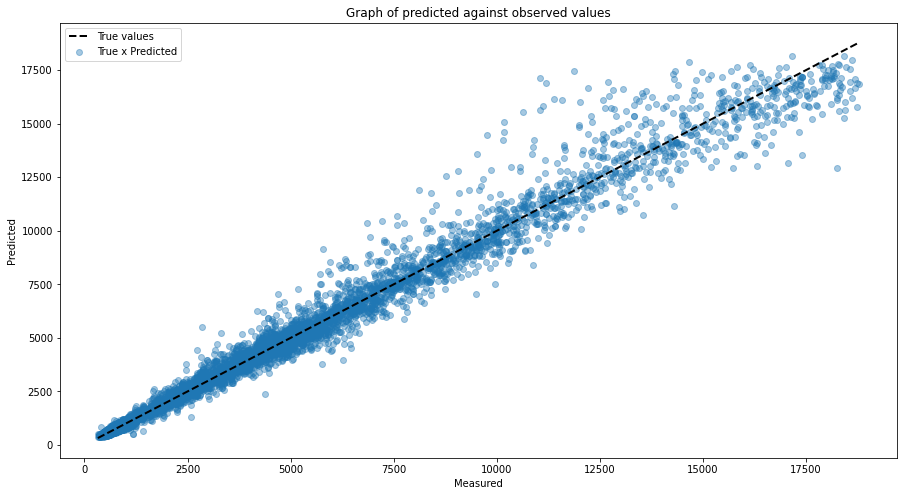

In [76]:
def scatter_plot_eval(y_true, y_pred, fig_size=(15,8), alpha=0.4):
    """
    Plot the graph of true target values (observed) against predicted target values.
    The method is useful in cases when the model has multiple explanatory variables (X's).
    """
    plt.figure(figsize=fig_size)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], "k--", lw=2, label="True values")
    plt.scatter(y_true, y_pred, alpha=alpha, label="True x Predicted")
    plt.title("Graph of predicted against observed values")
    plt.xlabel("Measured")
    plt.ylabel("Predicted")
    plt.legend()
    plt.show()


# Plot the predicted vs true values graph via function call
observed_set = y_test.copy()
predicted_set = y_test_predictions.copy()

scatter_plot_eval(observed_set, predicted_set)

**Observations**

* The graph of predicted diamonds prices against true diamonds prices illustrates performance of the Random Forest Regressor model on the test set comprising of  8,070 instances/ observations.
* One of the assumptions of linear regression analysis requires that data points should be randomly distributed linearly.
    * Linear random distribution of predicted data points about the true-diamonds-prices line is evident (to some extent) in the figure.
    * The graph reveals that there is a limited model performance based on diamonds prices.
    * It can be observed that the model performs better when diamonds prices are at most 7,500 USD. Beyond 7,500 USD, the model gives less-reliable predictions, hence higher prediction errors.


* In the next cells, both the scattergram and histogram plots of residuals will be plotted in order to visualize distribution of prediction errors (that is, residuals).

### 5.2.1. Residual Plot

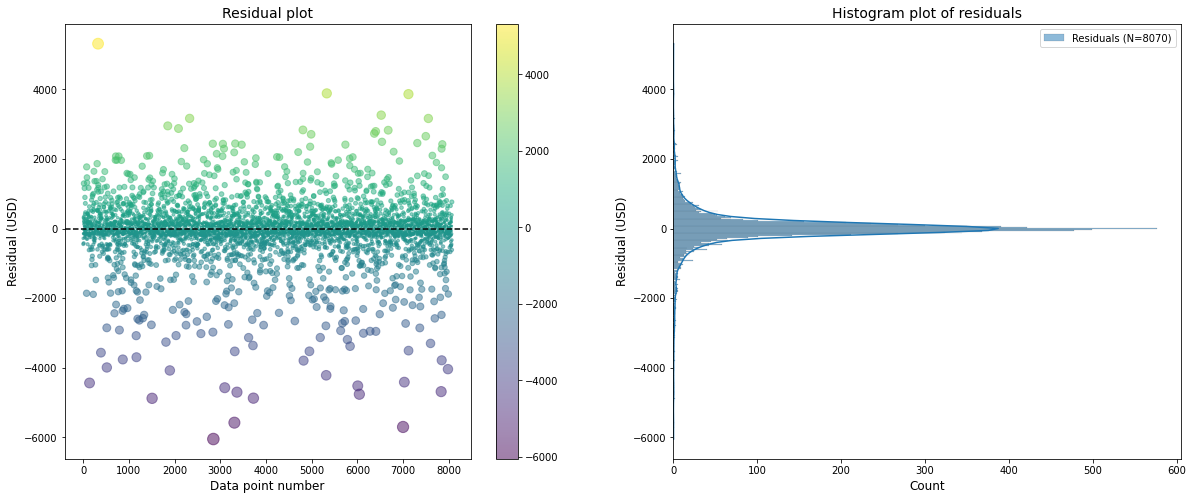

In [78]:
def residual_plot_eval(y_true, y_pred, y_unit=None):
    num_datapoints = len(y_true)
    residual = y_true - y_pred
    residual_df = pd.DataFrame({"res": residual})     # For extracting residuals as a variable for horizontal histplot graph
    data_number = (np.arange(num_datapoints)) + 1
    point_size = np.abs(residual)/45
    
    plt.figure(figsize=(20,8))
    plt.subplot(121)
    plt.axhline(y=0, lw=1.5, color="k", ls="--")
    plt.scatter(data_number, residual, s=point_size, c=residual, cmap="viridis", alpha=0.5)
    plt.colorbar()
    plt.title("Residual plot", fontsize=14)
    plt.xlabel("Data point number", fontsize=12)
    plt.ylabel(f"Residual ({y_unit})",fontsize=12)
    
    plt.subplot(122)
    sns.histplot(data=residual, y=residual_df["res"], kde=True,
                 label=f"Residuals (N={num_datapoints})",
                )
    plt.title("Histogram plot of residuals", fontsize=14)
    plt.xlabel("Count", fontsize=12)
    plt.ylabel(f"Residual ({y_unit})", fontsize=12)
    plt.legend()
    plt.show()


# Plot residual plot
residual_plot_eval(observed_set, predicted_set, y_unit="USD")

**Observations**
* Both graphs of Residual plot and Histogram plot of residual show distribution of residuals.
* In the Residual plot, both the size and color of each data point represent relative magnitude of the error between the true diamond price and the predicted price in relation to other residues.


* In the Residual scattergram, it is shown that the residuals are randomly scattered along the "y = 0" horizontal line, satisfying one of the assumptions of linear regression analysis which requires that residuals should not display any form of pattern.
    * In case residuals form a pattern on the residual plot, it simply implies that the model fails to map the exploratory variables effectively onto the response variable.
    * The above scattergram reveals that a significant number of residuals fall far away from the "y = 0" line, suggesting that the model somehow fails to explain the response variable (diamond price), leading to higher prediction errors. Therefore, other powerful models, such as the eXtreme Gradient Boosting (XGBoost), will be trained on the dataset.
    * The residual plot shows that the difference between true diamonds prices and predicted prices may be as high as 4,000 USD and sometimes as low as 6,000 USD.


* On the other hand, the Histogram plot of residuals shows that the residuals are well-distributed around the zero mark as per the requirements of regression analysis.
    * However, the fact that the residuals are slightly negatively skewed cannot be neglected as is evident in the histogram plot.

# 6. Conclusion and Recommendations

## 6.1. Conclusion
* Among the three regression models trained on the dataset, the random forest regressor has shown remarkable performance in predicting diamonds prices.
* The simplest regression model, linear regression, was underfitting the data. On the other hand, due to some of its associated errors, the decision tree regressor was proved to be overfitting the data; both cases generally lead to high generalization errors on the test set and fresh data.
* It is confident that, at 95% confidence level, the generalization error is bound between 527.28 USD and 581.81 USD. Given the range of price data distribution, this population estimate is fair and acceptable.

## 6.2. Recommendation
* According to the residual plot, there is a need to try fitting other powerful models such as XGBoost. Therefore, future work will put emphasis on utilization of the XGBoost Python library in order to minimize the generalization error and consequently come up with an efficicient predictive model.